In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading and Exploring the Dataset

In [2]:
import pandas as pd

# Load the Weather dataset
df = pd.read_csv('/kaggle/input/weather-data/weather_data.csv')
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


In [3]:
# Display first few rows of the dataset
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [4]:
# Display last few rows of the dataset
df.tail()


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036
999999,New York,2024-04-16 16:11:52,10.725351,43.804584,1.883292,15.363828


# Data Cleaning:
Check for missing values and clean the dataset accordingly

In [7]:
# Check for missing values
df.isnull().sum()

# Optionally, you can drop rows with missing values
df.dropna(inplace=True)

# You can also fill missing values, for example:
# df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)

# Exploratory Data Analysis (EDA)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


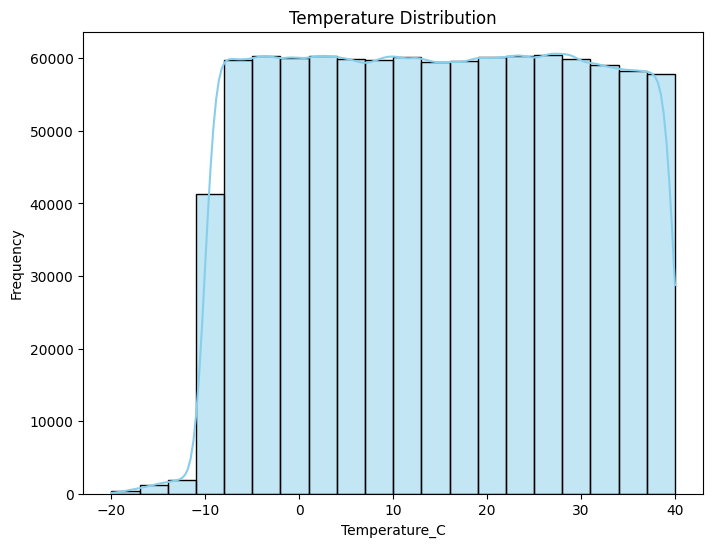

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Temperature
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature_C'], bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature_C')
plt.ylabel('Frequency')
plt.show()

Humidity vs. Temperature: A scatter plot can be used to analyze the relationship between humidity and temperature.

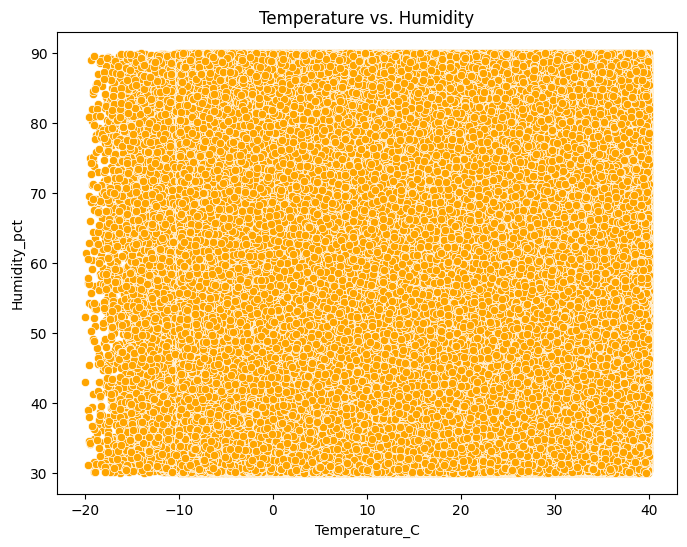

In [12]:
# Scatter plot of Temperature vs Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature_C', y='Humidity_pct', data=df, color='orange')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature_C')
plt.ylabel('Humidity_pct')
plt.show()

Wind Speed vs. Temperature: A similar scatter plot can be used to check the relationship between wind speed and temperature.

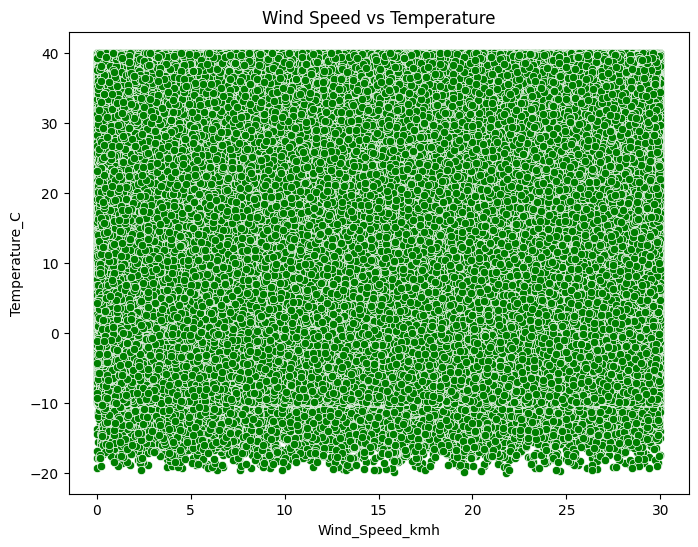

In [13]:
# Scatter plot of Wind Speed vs Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wind_Speed_kmh', y='Temperature_C', data=df, color='green')
plt.title('Wind Speed vs Temperature')
plt.xlabel('Wind_Speed_kmh')
plt.ylabel('Temperature_C')
plt.show()

# Summary Statistics

In [14]:
# Display basic statistics
df.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973
